In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import itertools
from adjustText import adjust_text
import numpy as np

In [23]:
shap_values = pd.read_csv('tonsils_shap.csv', index_col=0)

/ihome/hosmanbeyoglu/kor11/miniforge3/envs/spicess/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/ihome/hosmanbeyoglu/kor11/miniforge3/envs/spicess/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


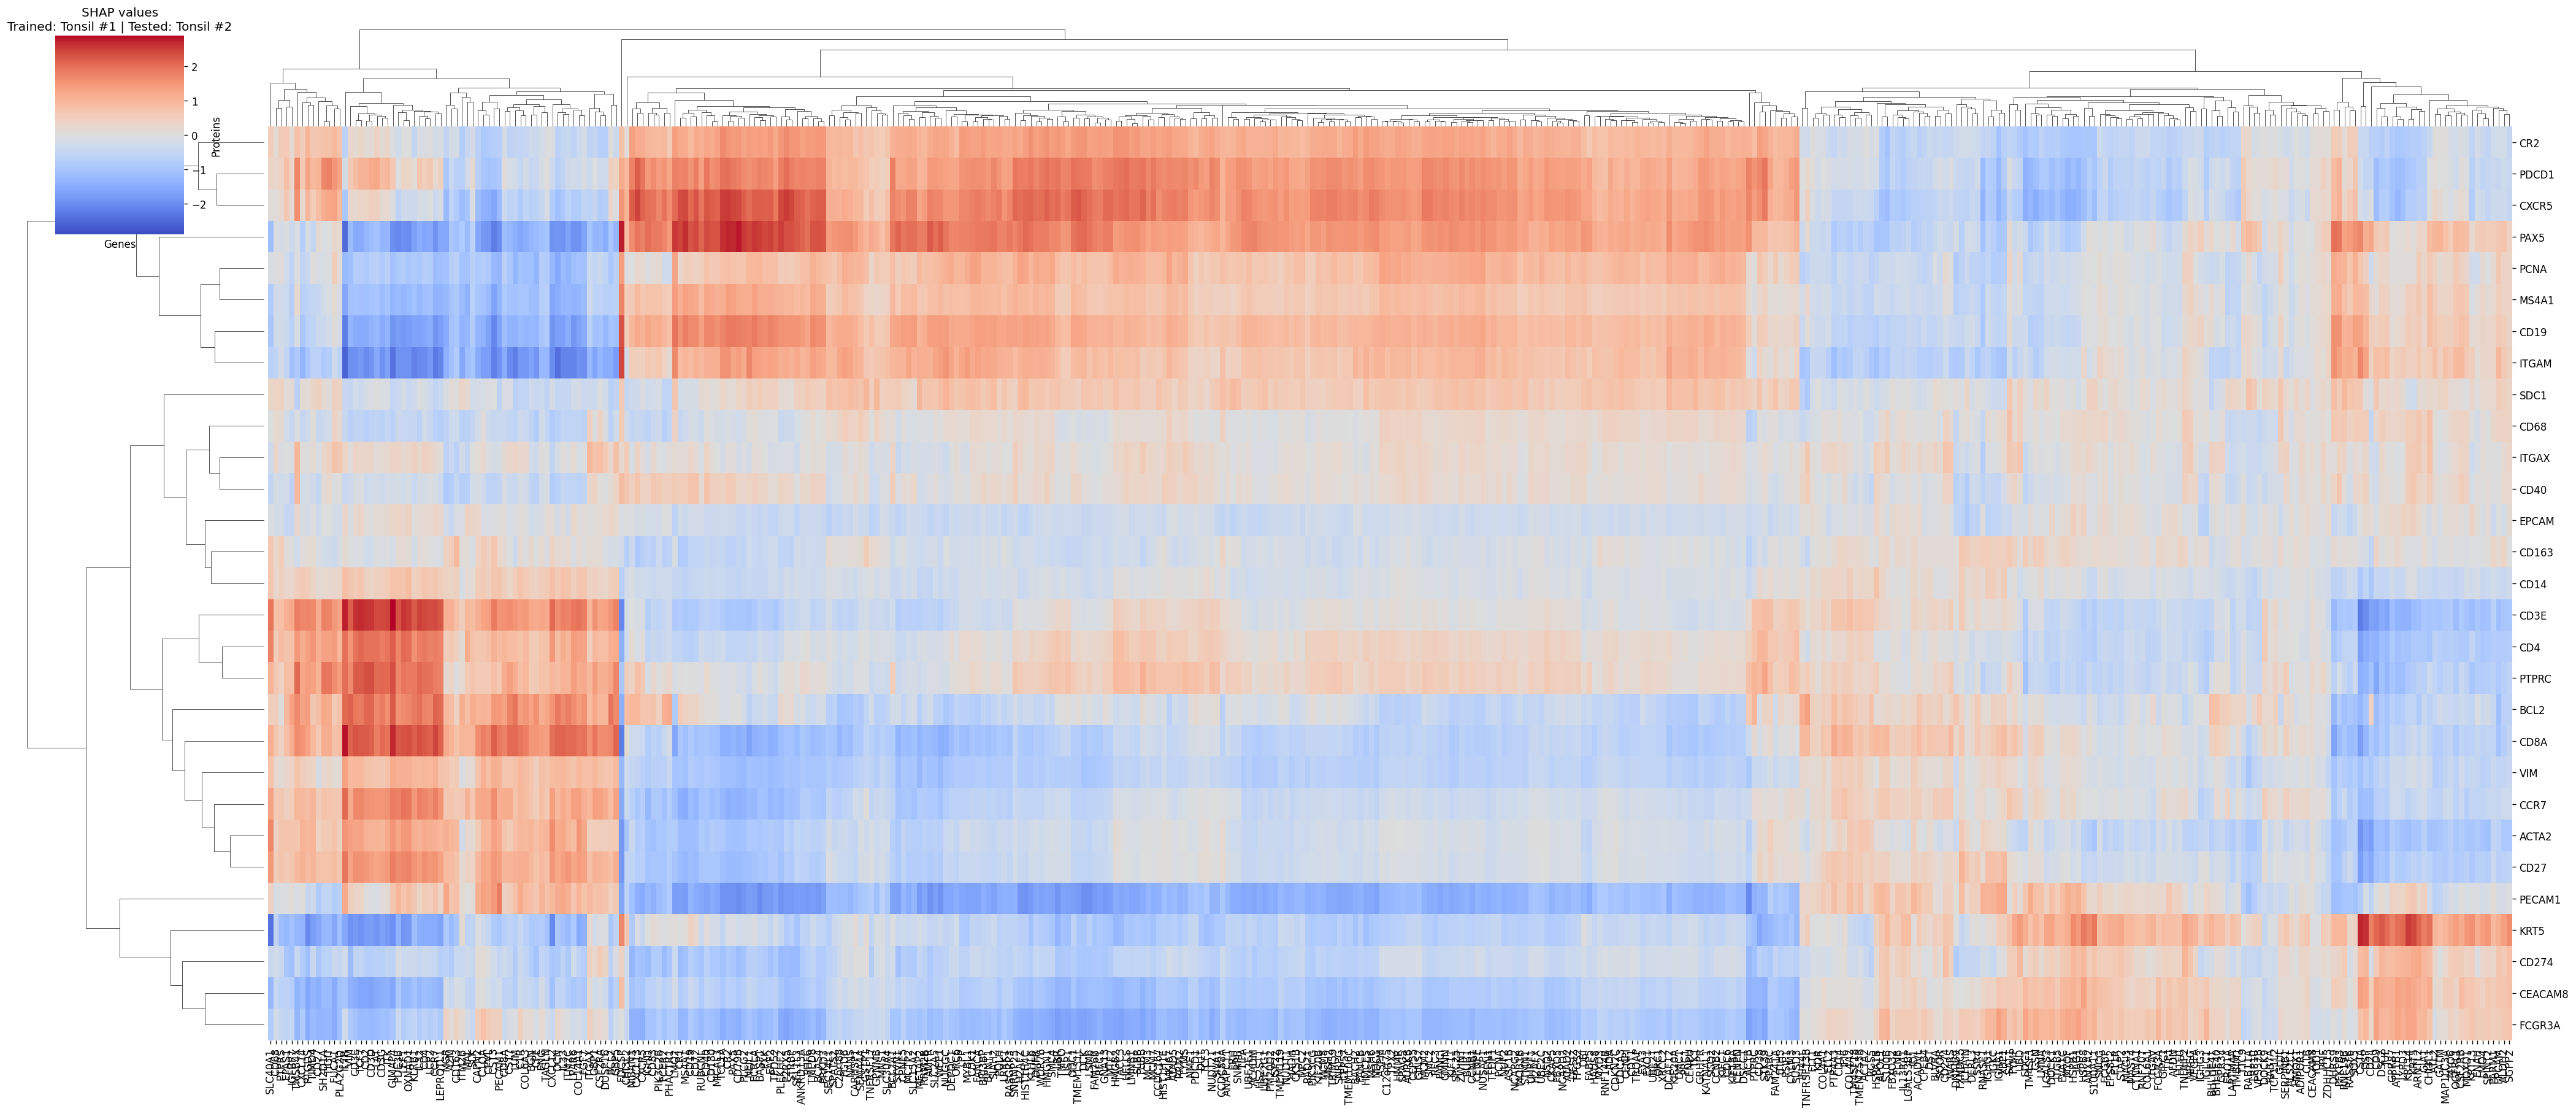

In [24]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.dpi'] = 120

sns.clustermap(
    shap_values, 
    square=False, 
    cbar=True, 
    cmap='coolwarm',  
    norm=colors.CenteredNorm(), 
    xticklabels=True, 
    yticklabels=True, 
    figsize=(35, 15), 
    dendrogram_ratio=0.1,
    cbar_kws={"orientation": "vertical", "shrink": 0.0}
)

plt.title('SHAP values\nTrained: Tonsil #1 | Tested: Tonsil #2')
plt.xlabel('Genes')
plt.ylabel('Proteins')
plt.show()

In [25]:
var_names = ['CD163', 'CR2', 'PCNA', 'VIM', 'KRT5', 'CD68', 'CEACAM8', 'PTPRC_1',
       'PAX5', 'SDC1', 'PTPRC_2', 'CD8A', 'BCL2', 'CD19', 'PDCD1', 'ACTA2',
       'FCGR3A', 'ITGAX', 'CXCR5', 'EPCAM', 'MS4A1', 'CD3E', 'CD14', 'CD40',
       'PECAM1', 'CD4', 'ITGAM', 'CD27', 'CCR7', 'CD274']

In [26]:
plist = ['BCL2',
 'CCR7',
 'CD163',
 'CD3E',
 'CD40',
 'CR2',
 'ITGAX',
 'KRT5',
 'MS4A1',
 'PAX5',
 'PECAM1']

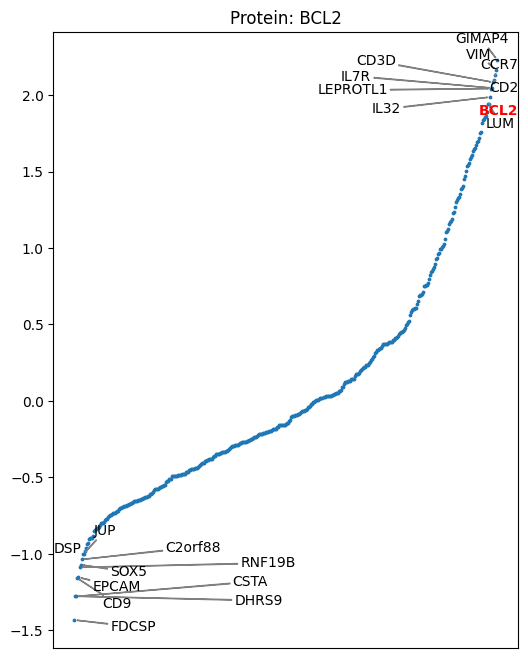

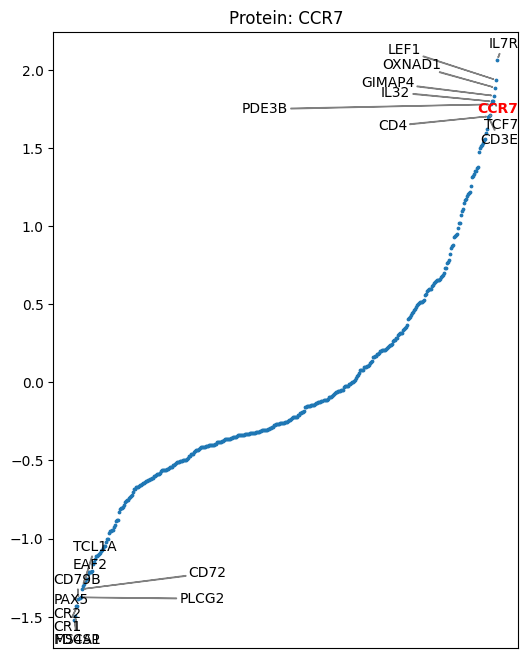

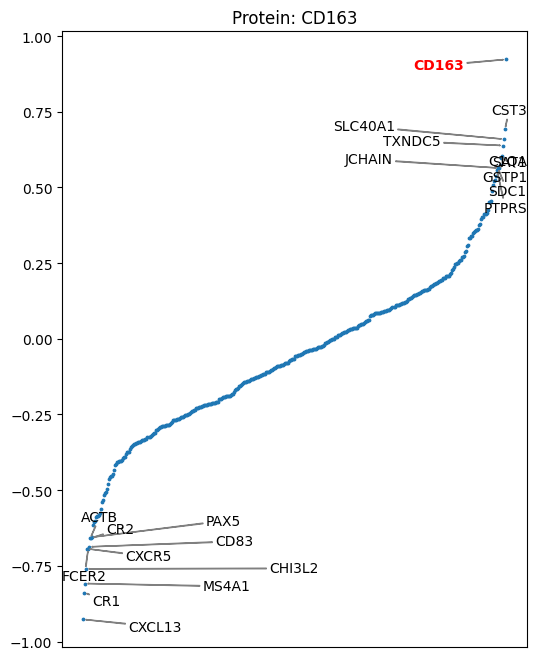

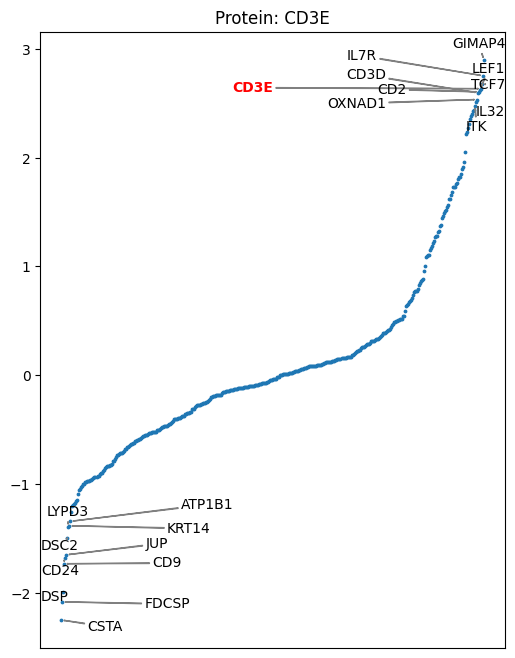

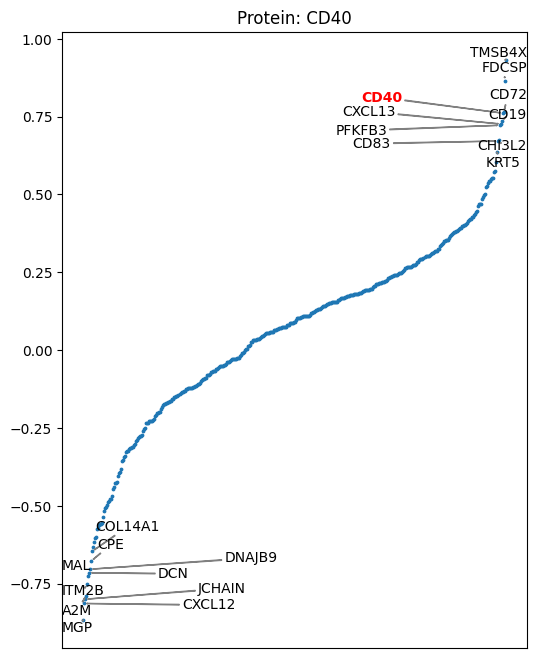

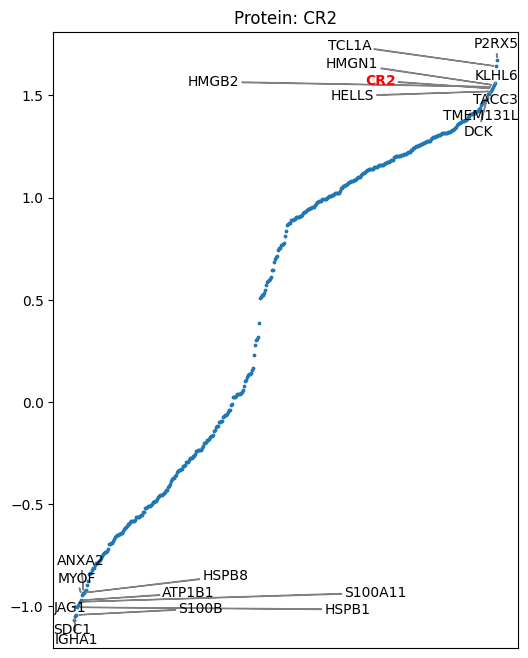

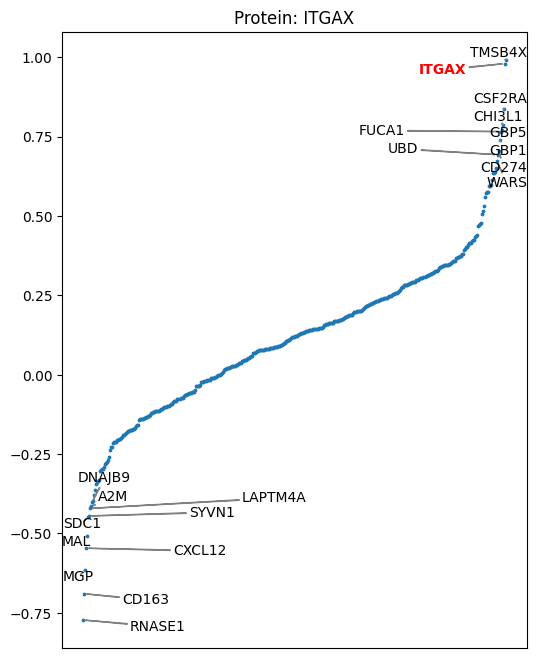

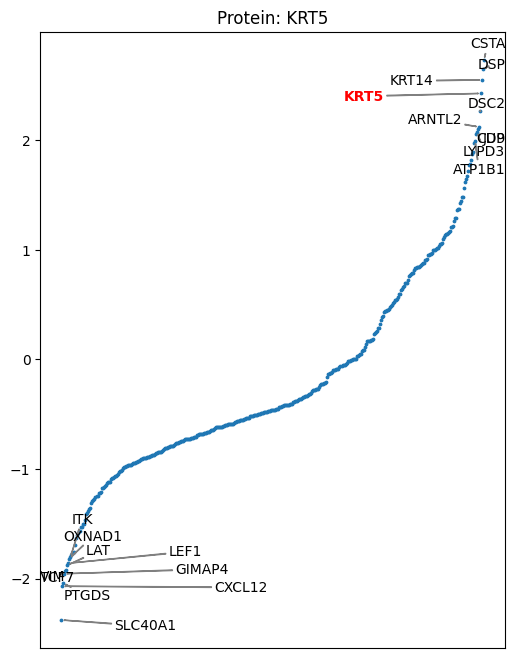

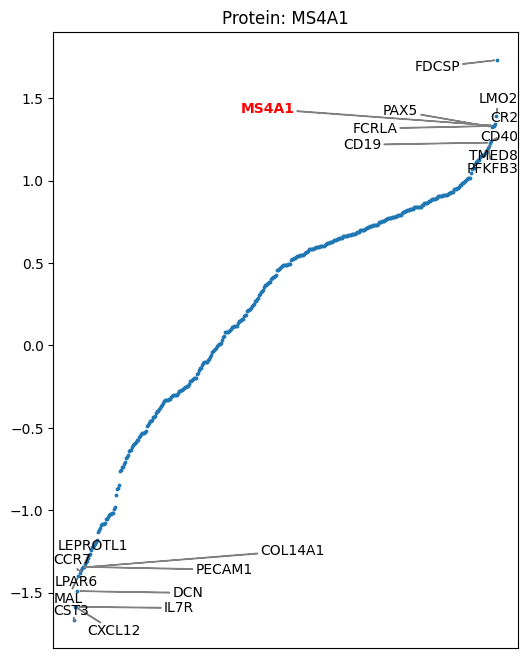

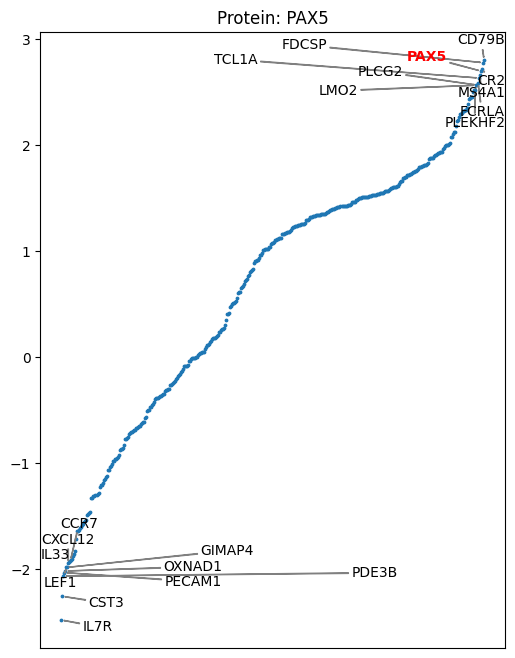

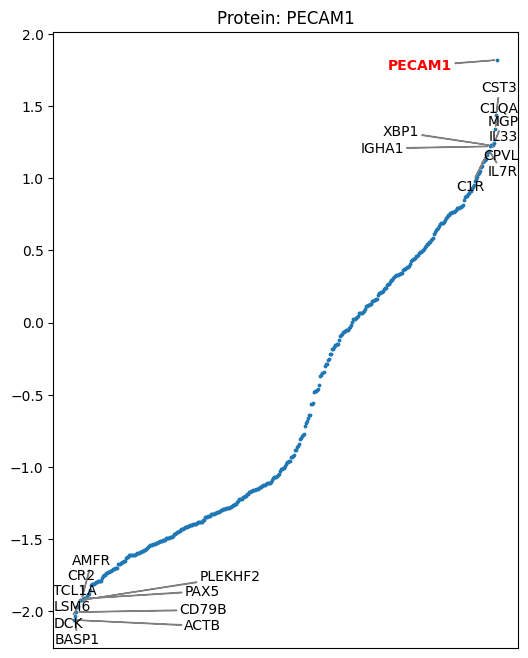

In [22]:
plt.rcParams['figure.figsize'] = [6, 8]
plt.rcParams['figure.dpi'] = 100

for p in plist:
    fig, ax = plt.subplots()
    tt = []
    xy = shap_values.loc[p].sort_values()
    x = xy.values
    y = xy.index
    ax.scatter(y, x, s=3)
    
    for i, j in zip(x[:10], y[:10]):
        if j == p:
            tt.append(
                ax.text(j, i, j, 
                        ha='center', 
                        va='center', 
                        color='red', 
                        fontweight='bold'))
        else:
            tt.append(
                ax.text(j, i, j, 
                        ha='center', 
                        va='center', 
                        color='black'))
        
    for i, j in zip(x[-10:], y[-10:]):
        if j == p:
            tt.append(
                ax.text(j, i, j, 
                        ha='center', 
                        va='center', 
                        color='red', 
                        fontweight='bold'))
        else:
            tt.append(
                ax.text(j, i, j, 
                        ha='center', 
                        va='center', 
                        color='black'))
    
    ax.set_xticks([])
    ax.set_title(f'Protein: {p}')
        
    adjust_text(tt, expand=(3, 1), 
                arrowprops=dict(arrowstyle='fancy', color='grey'))
    plt.show()